## Exploratory Data Analysis (Pre)

In [2]:
import sys
import os
import pandas as pd

sys.path.append("src")

import eda as eda

In [3]:
dibas_dir = "data/raw/dibas"

In [4]:
metadata_df = eda.load_image_metadata(dibas_dir)
display(metadata_df.head())

/home/jeyb/Desktop/gramAI/.venv/lib/python3.13/site-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


,filename,width,height,format,size_kb
0,Listeria.monocytogenes_0017.tif,2048,1532,TIFF,9249.388672
1,Neisseria.gonorrhoeae_0007.tif,2048,1532,TIFF,9249.392578
2,Clostridium.perfringens_0013.tif,2048,1532,TIFF,9249.388672
3,Lactobacillus.crispatus_0009.tif,2048,1532,TIFF,9249.388672
4,Lactobacillus.gasseri_0018.tif,2048,1532,TIFF,9249.388672


In [5]:
corrupt_images = eda.detect_corrupt_images(dibas_dir)
print("Corrupt Images:", corrupt_images)

Corrupt Images: ['Micrococcus.spp_0021.tif', 'Micrococcus.spp_0023.tif', 'Listeria.monocytogenes_0023.tif']


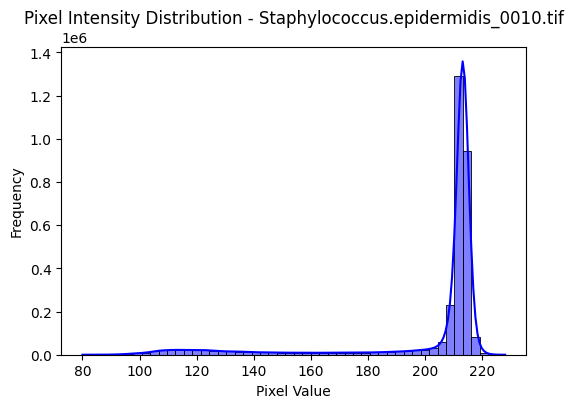

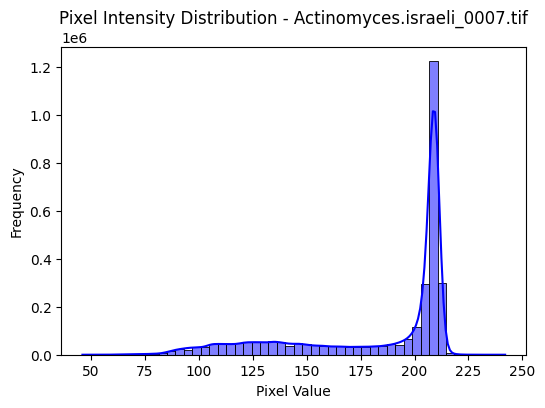

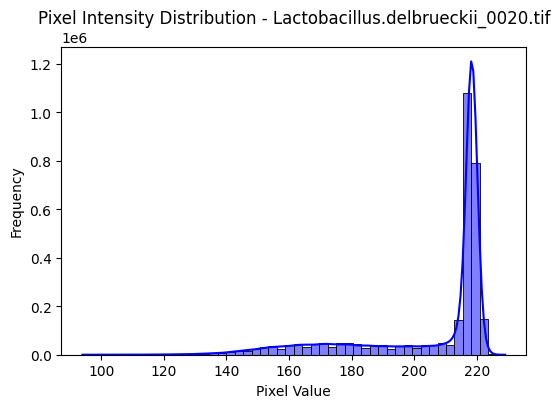

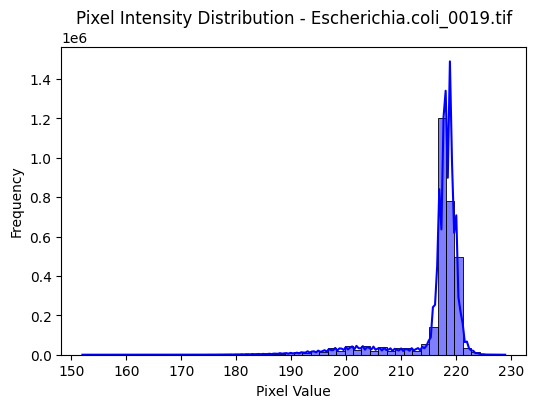

In [8]:
eda.plot_pixel_intensity_distribution(dibas_dir, num_samples=5)

(48, 4096)


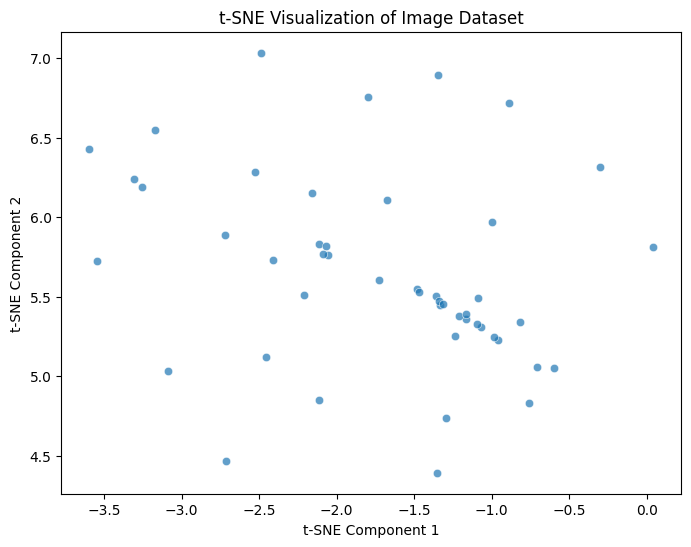

In [7]:
eda.plot_tsne_clusters(dibas_dir, num_samples=50)

## Data Cleaning

In [9]:
import data_cleaning as dc

In [7]:
dibas_dir_cleaned = "data/cleaned/dibas"
# dc.clean_image_dataset(dibas_dir, dibas_dir_cleaned, valid_formats=("png", "jpg", "jpeg", "tif"), remove_duplicates=True)

## Preprocessing

In [5]:
import preprocessing as pp

dibas_dir_preprocessed = "data/preprocessed/dibas"

In [8]:
pp.preprocess_images(dibas_dir_cleaned, dibas_dir_preprocessed, 
                  target_size=(128, 128), convert_grayscale=False, apply_augmentation=True, try_display=False)

Processing dibas:   0%|          | 0/689 [00:00<?, ?it/s]

Processing dibas: 100%|██████████| 689/689 [01:45<00:00,  6.50it/s]


✅ Preprocessing complete! Images saved in: data/preprocessed/dibas


In [9]:
pp.save_as_numpy(dibas_dir_preprocessed, convert_grayscale=False)

🔍 Found 7579 images.


Loading images: 100%|██████████| 7579/7579 [00:18<00:00, 404.56it/s]


✅ Saved dataset: preprocessed_dataset.npy (Shape: (7579, 128, 128, 3))


✅ Loaded dataset with shape: (7579, 128, 128, 3)
✅ Dataset Summary:
Total Images: 7579
Image Shape: (128, 128, 3)
Mean Pixel Value: 0.5626
Std. Dev. of Pixel Values: 0.3492


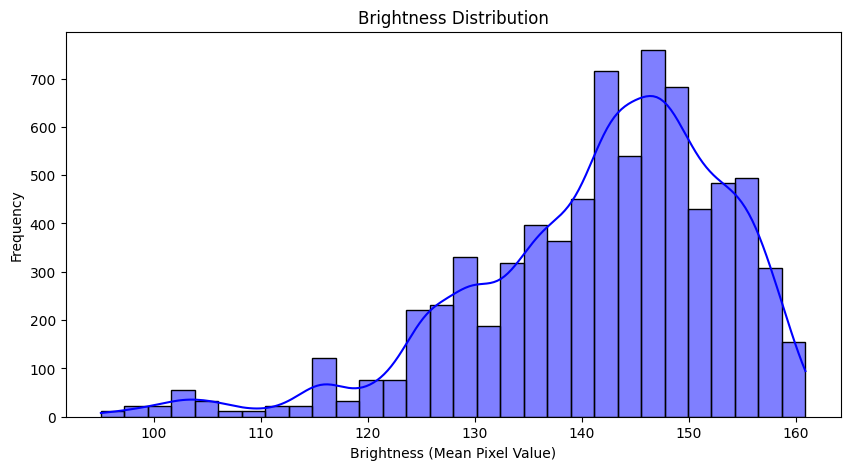

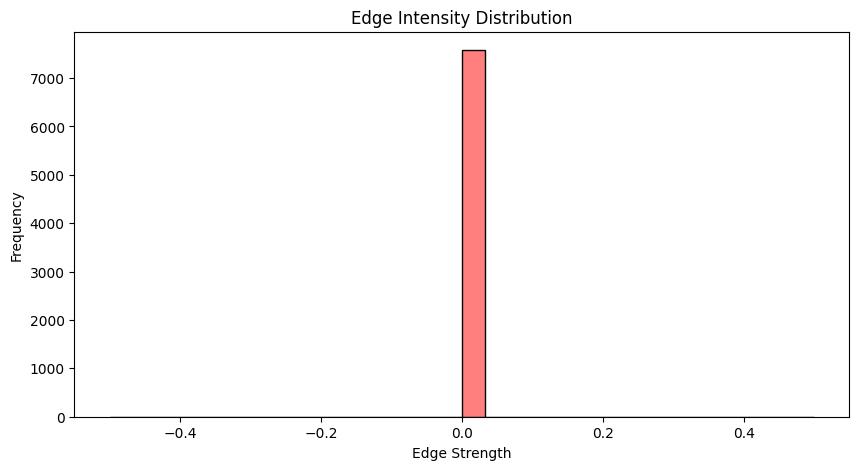

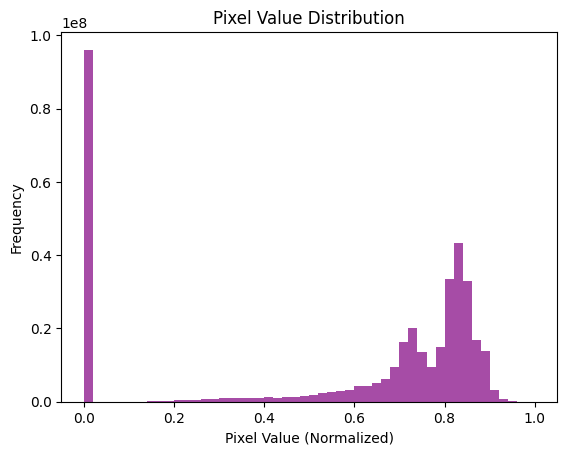

KeyError: 'label'

In [3]:
import pda as pda

# Load dataset and metadata
dataset = pda.load_dataset("preprocessed_dataset.npy")
metadata_df = pda.load_metadata("data/preprocessed/dibas/preprocessing_log.json")

# Perform post-analysis
pda.dataset_summary(dataset)
# pda.plot_class_distribution(metadata_df)
pda.plot_brightness_distribution(dataset)
pda.plot_edge_intensity(dataset)
pda.plot_pixel_distribution(dataset)
pda.visualize_pca(dataset, metadata_df["label"])
pda.visualize_tsne(dataset, metadata_df["label"])
pda.check_data_leakage(metadata_df)